In [28]:
from typing import List, Optional

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as ss
import seaborn as sns
from sklearn import model_selection, linear_model, preprocessing, metrics
import sklearn

In [18]:
df = pd.read_csv('data/processed/extracted.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Income,Kidhome,Teenhome,Customer_Years,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Accepted
0,58138.0,0,0,10,58,635,88,546,172,88,88,8,10,4,1
1,46344.0,1,1,9,38,11,1,6,2,1,6,1,1,2,0
2,71613.0,0,0,9,26,426,49,127,111,21,42,8,2,10,0
3,26646.0,1,0,9,26,11,4,20,10,3,5,2,0,4,0
4,58293.0,1,0,9,94,173,43,118,46,27,15,5,3,6,0


In [19]:
TRAIN_RATIO, N_SPLITS = 0.8, 3
X = df.drop(columns='Accepted')
y = df['Accepted']

In [20]:
X, y = X.to_numpy(), y.to_numpy()
test_ratio = 0.2

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_ratio, random_state=42,
                                                                    shuffle=True, stratify=y)

len(X_train), len(X_test)

(1764, 441)

In [23]:
clf = linear_model.LogisticRegression(random_state=42)

clf = clf.fit(X_train, y_train)

train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

In [24]:
len(train_preds), len(test_preds)

(1764, 441)

In [26]:
def get_accuracy(preds: np.ndarray, y: np.ndarray):
  num_correct = np.equal(preds, y, dtype=np.int16).mean()

  return num_correct

train_accuracy, test_accuracy = get_accuracy(train_preds, y_train), get_accuracy(test_preds, y_test)
train_accuracy, test_accuracy

(0.7811791383219955, 0.7709750566893424)

<AxesSubplot:>

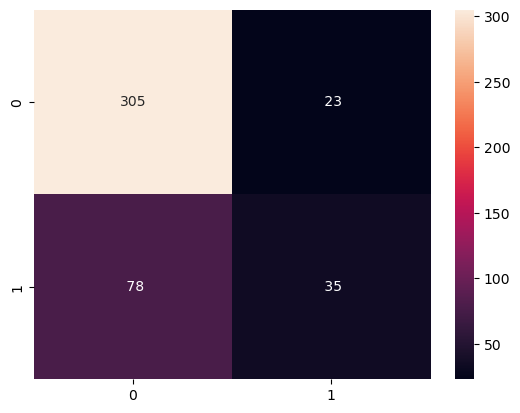

In [33]:
confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
sns.heatmap(confusion_matrix, fmt='3d', annot=True)

<AxesSubplot:>

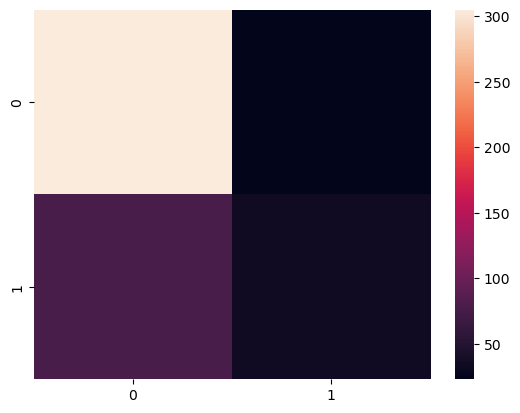

In [30]:
sns.heatmap(confusion_matrix)